# Assignment 7 - Fourier Analysis of the Solar Sunspot Counts

## Authors
B.W. Holwerda 

## Learning Goals
* Fourier Transform
* Data-compression
* reconstructing data from Fourier spectrum

## Keywords

Fourier, Fourier analysis, Fourier Transform

## Companion Content

Based on this article:

https://medium.com/@sydneynye/unlocking-the-power-of-fourier-transforms-in-data-science-and-machine-learning-3b96c08bfd7f

See the video on the Japanse astronomer who tracked the Sun's activity: 
https://youtu.be/LxM9PhcY_90?si=O5GFmG3CZJIXZesO

## Summary

Data on the number of sunspots is one of the longest running information we have. Relatively easy to record, good data is available for *close to three centuries*. This allows for some good longitudinal (long-lasting) studies. 

<hr>


## Student Name and ID:



## Date:

<hr>

In [20]:
import numpy as np
import pandas as pd
# import plotly.graph_objects as go
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

# Load Sunspots data
url = 'http://www.sidc.be/silso/INFO/snmtotcsv.php'
df = pd.read_csv(url, delimiter=';', header=None)

# Rename columns
df.columns = ['Year', 'Month', 'Date_in_fraction_of_year', 'Monthly_Mean_Total_Sunspot_Number', 'Monthly_Mean_Standard_Deviation', 'Number_of_Observations', 'Definitive_Provisional_Indicator']

# Create 'Date' column
# df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Select 'Monthly Mean Total Sunspot Number'
y = df['Monthly_Mean_Total_Sunspot_Number'].values

# Compute the Fast Fourier Transform
yf = np.fft.fft(y)

# Compute the frequencies
t = np.arange(y.size)
xf = np.fft.fftfreq(t.size, t[1] - t[0])



### Exercise 1 - Making a Date Column

The data already has a date as a fraction of the year column. It also has the year and month the number of sunspots were reported. How can you create a 'date' column from the year and month column?

In [1]:
# student work


### Exercise 2 - Plot the number of sunspots 

With date on the x-axis, plot the mean number of sunspots per month. Connect the data as a line. 

In [2]:
# student work here


### Exercise 3 - Notes on the data

What do you note about this data? Is it periodical? How many peaks of sunspot activity can be seen? How long does a period of activity last? What is the difference between high and low?

*student answer here*

### Exercise 4 - Define time in months

Define a time variable (t) starting at month 0 and counting up to the present day in months for the length of the data. t will have to be a numpy array starting at 0 of size of the df.

In [3]:
# student work here


# Fast Fourier Transform

We will not take the FFT (Fast Fourier Transform) of the number of monthly sunspots. This is available in numpy as (np.fft).

This is where we compute for a signal f(t) that changes with time t:  

$$ F(\omega) = \int_{-\inf}^{\inf} f(t) e^{-i\omega t} dt $$

the function of F($\omega$) is the strength of the signal as a function of the frequency ($\omega$). 
As you can see, there is a time step (dt) here. In our data, this is easy to identify: one month. We now need to define time starting at month 0 and counting up to the present day in months. 



In [41]:
# Compute the Fast Fourier Transform
yf = np.fft.fft(df['Monthly_Mean_Total_Sunspot_Number'])

# Compute the frequencies
xf = np.fft.fftfreq(t.size, t[1] - t[0])


### Exercise 5 - Plot frequency - FFT signal

Make a plot of the the frequency and FFT signal. What is the size of the frequency range? How does that compare to the length of the data-set?


In [4]:
# student work here


### Exercise 6 - Plot frequency - FFT signal 

Zoom your plot of frequency-signal into the area around 0. What do you notice? Where is the majority of the signal (devation from 0). 

In [5]:
# student work here


### Exercise 7 - reconstructing the data

We will now reconstruct the time-series data from the Fourier transformation data. 
For this we use the inverse Fast-Fourier Transform function (ifft) in numpy's FFT package. 

Plot the original data as a black line and the reconstructed data as a different, semi-transparent color.


In [6]:

# reconstruct the y-data by inverse Fast-Fourier Transform
y_reconstructed = np.fft.ifft(yf)


# student work here:


NameError: name 'np' is not defined

### Exercise 8 - reconstructing the data

Make a zoom-in of the above plot for the 19th century (1800-1900). How well does the reconstructed data fit the observations? 


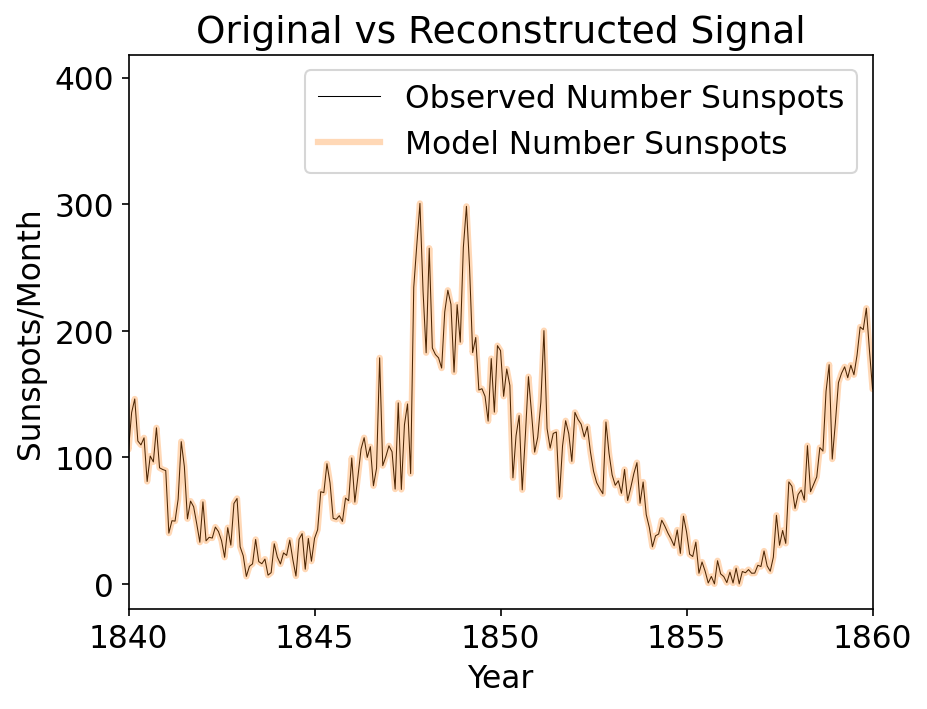

In [82]:
# reconstruct the y-data by inverse Fast-Fourier Transform
y_reconstructed = np.fft.ifft(yf)


# student work here:


### Exercise 9 - reconstructing the data difference

Plot the difference between the observations and the reconstructed values. Is there much signal left? 

In [7]:
# student work here


### Exercise 10 - reconstructing the data - compression

How much information in the spectrum do we really need? Make a copy of the yf data we derined above and set every value above a certain frequency (the xf series) to zero. The inverse Fast Fourier Transform this yf2. 

Plot the original data and the yf2. If the limiting frequncy is 0.02, is the reconstructed data a reasonable description of the data for the whole 3 centuries? What about focusing on just two decades in the middle of the nineteenth century? or the 20th century? 

In [10]:
# student work here


### Exercise 11 - reconstructing the data - compression

In the above example, how many data-points are there in the limited frequencies that aren't equal to zero? 
Compare that to the length of yf. How much smaller is yf2. Do we need the full range of frequencies to almost reproduce the data?


In [9]:
# student work here


### Exercise 12 - reconstructing the data - compression

run through the frequency range of 0.001 to 0.5 in steps of 0.001 and reconstuct the data using the range at each step. Compute the standard deviation of the difference between the data and the reconstructed data. Plot this standard deviation as a function of the limiting frequency.

In [11]:
# student work here


### Exercise 13 - compression - loss

Using the above plot, if a standard deviation of 10 sunspots is my quality limit, what frequency range should I use to compress the data with Fast Fourier Transform?

*student answer here*

<hr>